In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import streamlit as st

In [4]:
st.title('Europe Visulized')

2024-06-10 17:14:13.121 
  command:

    streamlit run c:\Users\danic\miniconda3\envs\data_analysis\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

## Process map

In [2]:
test_df = gpd.read_file('ref-countries-2020-01m.geojson/CNTR_RG_01M_2020_4326.geojson')

DriverError: ref-countries-2020-01m.geojson/CNTR_RG_01M_2020_4326.geojson: No such file or directory

In [8]:
test_df[test_df["CC_STAT"] == "T"]

,id,CNTR_ID,CNTR_NAME,NAME_ENGL,NAME_FREN,ISO3_CODE,SVRG_UN,CAPT,EU_STAT,EFTA_STAT,CC_STAT,NAME_GERM,FID,geometry
10,AL,AL,Shqipëria,Albania,Albanie,ALB,UN Member State,Tirana,F,F,T,Albanien,AL,"MULTIPOLYGON (((20.07630 42.55582, 20.08530 42..."
137,MK,MK,Северна Македонија,North Macedonia,Macédoine du Nord,MKD,UN Member State,Skopje,F,F,T,Nordmazedonien,MK,"POLYGON ((22.36021 42.31116, 22.36704 42.30863..."
146,MD,MD,Moldova,Moldova,Moldavie,MDA,UN Member State,Chisinau,F,F,T,Moldau,MD,"MULTIPOLYGON (((28.21136 45.46728, 28.18673 45..."
149,ME,ME,Црна Гора,Montenegro,Monténégro,MNE,UN Member State,Podgorica,F,F,T,Montenegro,ME,"MULTIPOLYGON (((18.43810 42.55571, 18.44670 42..."
174,RS,RS,Србија,Serbia,Serbie,SRB,UN Member State,Belgrade,F,F,T,Serbien,RS,"MULTIPOLYGON (((20.26430 46.12637, 20.26452 46..."
205,UA,UA,Україна,Ukraine,Ukraine,UKR,UN Member State,Kyïv,F,F,T,Ukraine,UA,"MULTIPOLYGON (((38.23026 47.11935, 38.18633 47..."
216,TR,TR,Türkiye,Türkiye,Turquie,TUR,UN Member State,Ankara,F,F,T,Türkei,TR,"MULTIPOLYGON (((41.54713 41.52038, 41.55688 41..."


In [69]:
europe_df = pd.concat([test_df[(test_df["EU_STAT"] == "T") | (test_df["EFTA_STAT"] == "T") | (test_df["CC_STAT"] == "T")], test_df[test_df["NAME_ENGL"] == "United Kingdom"]])
drop_cols = ["CNTR_ID", "CNTR_NAME", "NAME_FREN", "SVRG_UN", "NAME_GERM", "EU_STAT", "EFTA_STAT", "CC_STAT", "FID"]
europe_df = europe_df.drop(drop_cols, axis=1)
europe_df

,id,NAME_ENGL,ISO3_CODE,CAPT,geometry
10,AL,Albania,ALB,Tirana,"MULTIPOLYGON (((20.07630 42.55582, 20.08530 42..."
13,AT,Austria,AUT,Vienna,"MULTIPOLYGON (((10.45444 47.55580, 10.47320 47..."
18,BE,Belgium,BEL,Brussels,"MULTIPOLYGON (((6.02100 50.75429, 6.03977 50.7..."
24,BG,Bulgaria,BGR,Sofia,"POLYGON ((22.67516 44.21566, 22.69084 44.20456..."
41,CH,Switzerland,CHE,Bern,"POLYGON ((9.55872 47.54189, 9.56183 47.50456, ..."
51,DK,Denmark,DNK,Copenhagen,"MULTIPOLYGON (((15.19308 55.32014, 15.19056 55..."
54,ES,Spain,ESP,Madrid,"MULTIPOLYGON (((4.09361 40.06178, 4.10332 40.0..."
59,EE,Estonia,EST,Tallinn,"MULTIPOLYGON (((28.04191 59.47012, 28.04319 59..."
62,EL,Greece,GRC,Athens,"MULTIPOLYGON (((29.63524 36.11068, 29.63181 36..."
66,CY,Cyprus,CYP,Nicosia,"MULTIPOLYGON (((34.60609 35.70767, 34.60060 35..."


In [70]:
len(europe_df)

40

(30.0, 72.0)

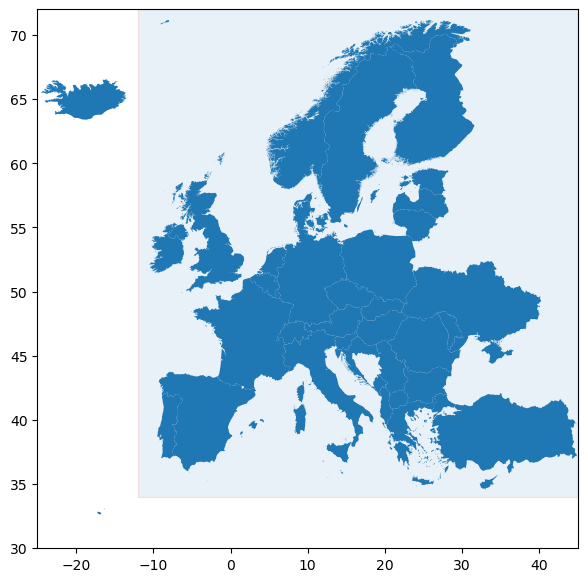

In [71]:
polygon = Polygon([(-12,34), (45,34), (45,72),(-12,72)])
poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=europe_df.crs)
fig,ax=plt.subplots(figsize=(7,7))
ax=europe_df.plot(ax=ax)
poly_gdf.plot(edgecolor="red",ax=ax, alpha=0.1)
ax.set_xlim(-25, 45)
ax.set_ylim(30, 72)
# plt.show()

In [72]:
europe_df = gpd.clip(europe_df, polygon)

In [74]:
# Drop Svalbard and Jan Mayen
europe_df = europe_df.drop(194, axis=0)

<Axes: >

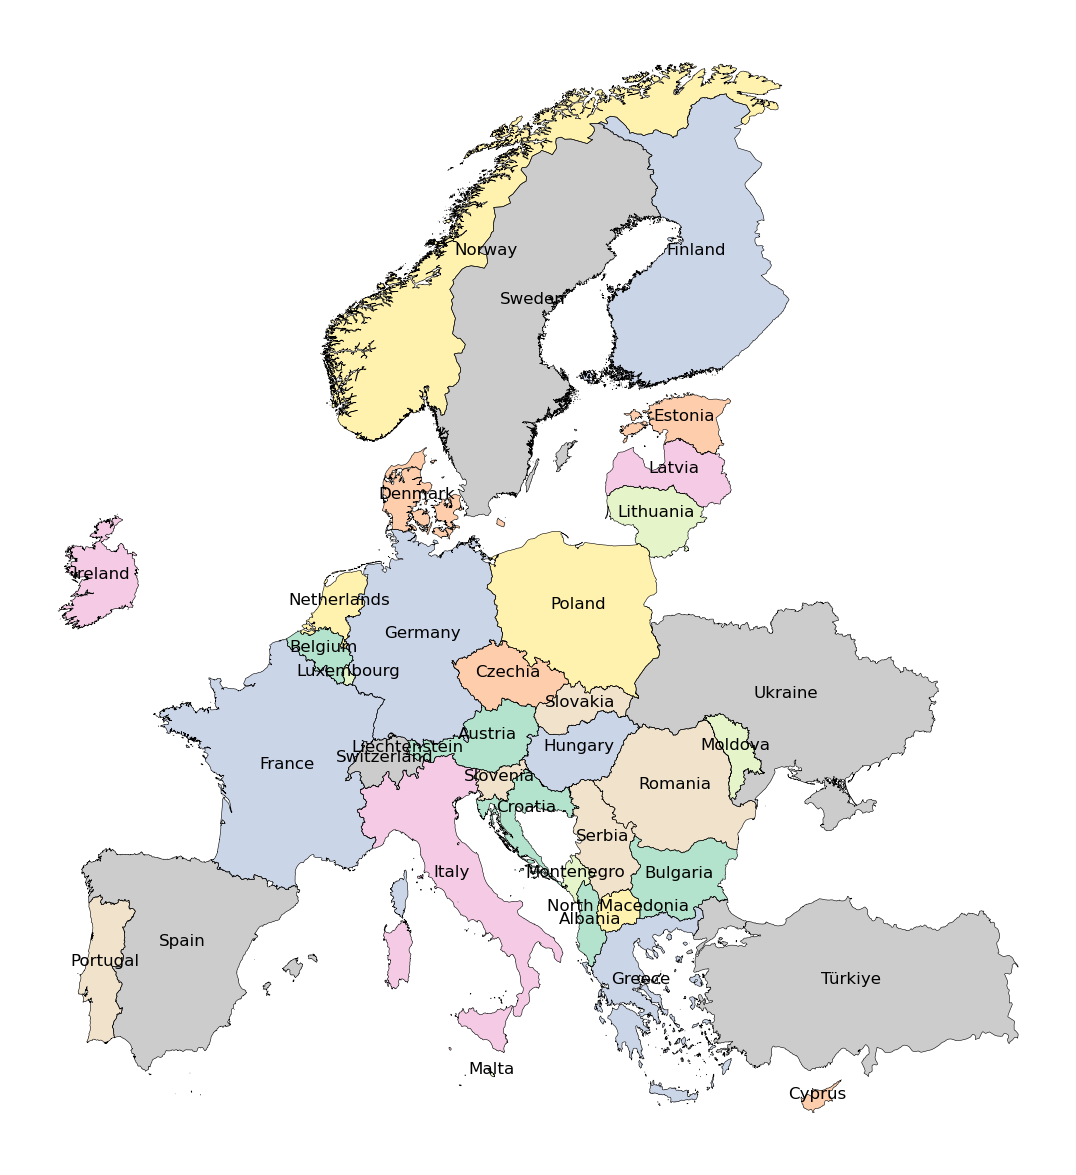

In [89]:
axis = europe_df.boundary.plot(color='Black', 
linewidth=.4, figsize=(15,15))
axis.set_axis_off()
# axis.set_xlim(-25, 45)
# axis.set_ylim(30, 72)
europe_df.apply(lambda x: axis.annotate(text=x.NAME_ENGL, xy=x.geometry.centroid.coords[0], ha='center', fontsize=12) 
                    if 'Territorio' not in x.NAME_ENGL
                    else axis.annotate(text='', xy=x.geometry.centroid.coords[0], ha='center', 
                    fontsize=12),axis=1)
europe_df.plot(ax=axis, cmap='Pastel2', 

figsize=(12, 12), column='NAME_ENGL')

In [75]:
europe_df.to_file("europe/europe.shp")

## Plottings

In [6]:
europe_df = gpd.read_file('europe/europe.shp')

In [7]:
europe_df["NAME_ENGL"].unique()

array(['France', 'Cyprus', 'Spain', 'Malta', 'Portugal', 'Greece',
       'Türkiye', 'Albania', 'Italy', 'North Macedonia', 'Montenegro',
       'Bulgaria', 'Serbia', 'Croatia', 'Romania', 'Slovenia',
       'Switzerland', 'Moldova', 'Liechtenstein', 'Hungary', 'Austria',
       'Ukraine', 'Slovakia', 'Czechia', 'Luxembourg', 'Belgium',
       'Germany', 'Poland', 'Netherlands', 'Ireland', 'Lithuania',
       'United Kingdom', 'Denmark', 'Latvia', 'Estonia', 'Sweden',
       'Norway', 'Finland'], dtype=object)

## Government expending per capita

In [78]:
exp_per_capita = pd.read_csv("total-gov-expenditure-percapita-oecd.csv")
exp_per_capita = exp_per_capita.drop("Entity", axis=1)

In [79]:
merged_df = europe_df.merge(exp_per_capita, left_on='ISO3_CODE', right_on="Code")

<Axes: >

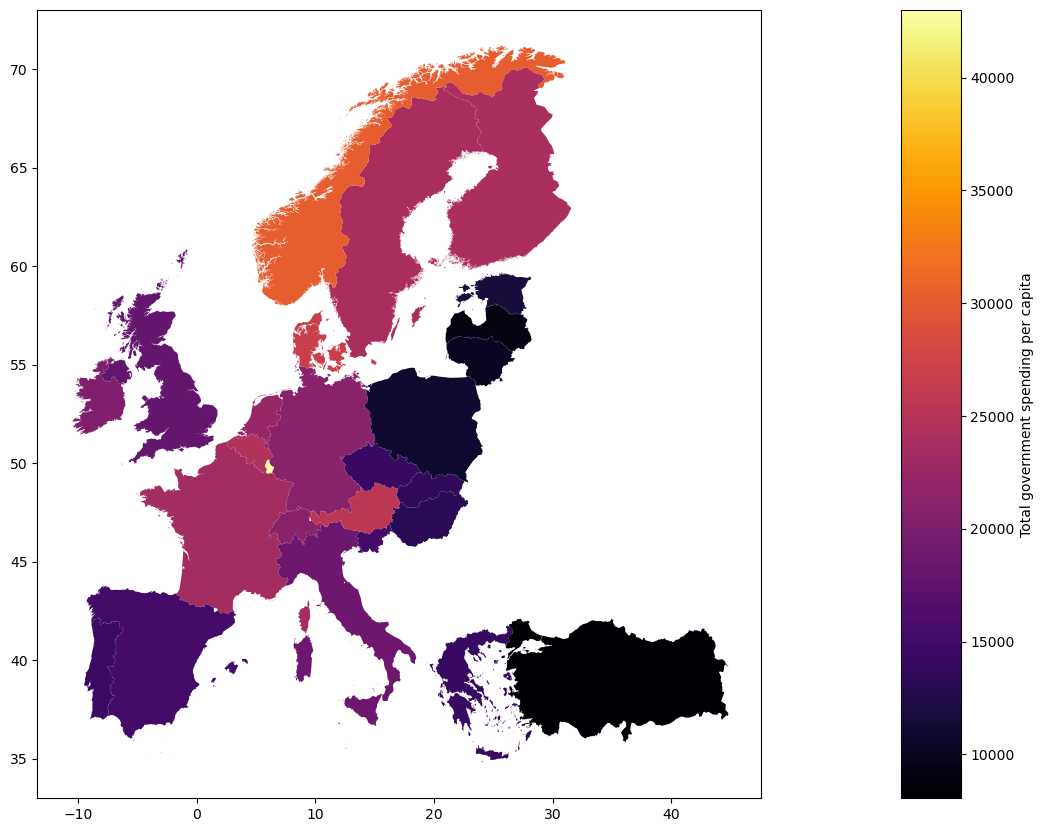

In [80]:
fig, axis = plt.subplots(1, 1, figsize=(15,15))
divider = make_axes_locatable(axis)
cax = divider.append_axes("right", size="5%", pad=-1)
merged_df[merged_df["Year"] == 2015].plot(ax = axis, cmap='inferno', column='Total government spending per capita', legend=True, cax=cax, legend_kwds={'label': "Total government spending per capita"})

In [ ]:
"""
    TODO:
    AFEGIR GASTO PER CAPITA RESPECTE A PIB PER CAPITA
"""

In [ ]:
fig, axis = plt.subplots(1, 1, figsize=(15,15))
divider = make_axes_locatable(axis)
cax = divider.append_axes("right", size="5%", pad=-1)
merged_df[merged_df["Year"] == 2015].plot(ax = axis, cmap='inferno', column='Total government spending per capita', legend=True, cax=cax, legend_kwds={'label': "Total government spending per capita"})

## 2022 GDP

In [8]:
country_name_mapping = {
    "Türkiye, Republic of" : "Türkiye",
    "Czech Republic" : "Czechia",
    "North Macedonia " : "North Macedonia",
    "Slovak Republic" : "Slovakia",
    "United Kingdom" : "United Kingdom"
}

def rename_country_names(df, column, country_name_mapping):
    df[column] = df[column].replace(country_name_mapping)
    return df

gdp_percap_df = pd.read_excel("gdp_percapita_ppp.xls")
gdp_percap_df = gdp_percap_df.rename({"GDP per capita, current prices (Purchasing power parity; international dollars per capita)": "Country Code"}, axis=1)
gdp_percap_df = rename_country_names(gdp_percap_df, 'Country Code', country_name_mapping)
gdp_percap_df = gdp_percap_df.loc[:, ["Country Code"]+[year for year in range(1995, 2025)]][gdp_percap_df["Country Code"].isin(europe_df["NAME_ENGL"].unique())]
gdp_percap_df = pd.concat([gdp_percap_df.iloc[:, :1], gdp_percap_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')], axis=1)

In [9]:
def calculate_returns(df, years, initial_year=2023):
    total_return = ((df[initial_year] / df[initial_year-years]) - 1) * 100
    cagr = ((df[initial_year] / df[initial_year-years]) ** (1 / years) - 1) * 100
    return total_return, cagr

timeframes = [5, 10, 15, 20]
for years in timeframes:  # only calculate total return for the longest time period
    _, cagr = calculate_returns(gdp_percap_df, years, initial_year=2023)
    gdp_percap_df[f'CAGR ({years}Y)'] = np.nan
    gdp_percap_df[f'CAGR ({years}Y)'] = round(cagr, 2)

max_years = max(timeframes)
total_return, _ = calculate_returns(gdp_percap_df, max_years, initial_year=2023)
gdp_percap_df[f'Total Return ({max_years}Y)'] = np.nan
gdp_percap_df[f'Total Return ({max_years}Y)'] = round(total_return, 2)

In [10]:
cols = ["Country Code", "CAGR (20Y)", "Total Return (20Y)", 2020, 2021, 2022, 2023]
gdp_percap_df_merged = europe_df.merge(gdp_percap_df[cols], how="left", left_on="NAME_ENGL", right_on="Country Code").drop(["Country Code"], axis=1)
# gdp_percap_df_merged.head()

<Axes: title={'center': 'GDP per capita PPP (2023)'}>

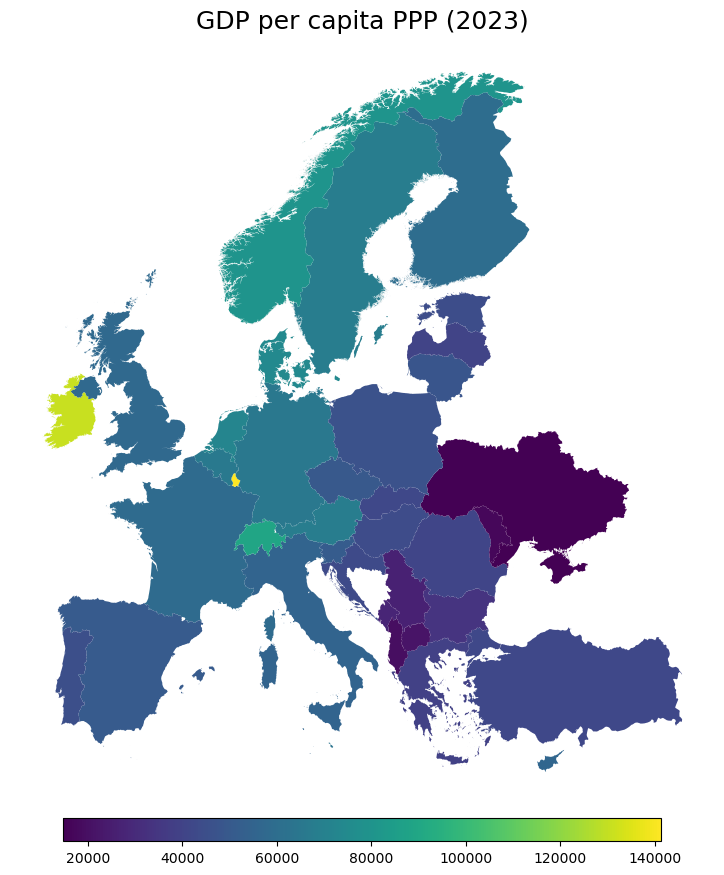

In [13]:
fig, axis = plt.subplots(1, 1, figsize=(10, 10))
axis.set_axis_off()
plt.title("GDP per capita PPP (2023)", fontdict={'fontsize': '18', 'fontweight' : '3'})
cax = inset_axes(axis, width="85%", height="3%", loc='lower center', borderpad=-2.5)
# cax = divider.append_axes("right", size="5%", pad=-1)
gdp_percap_df_merged.plot(
    ax = axis, 
    cmap='viridis', 
    column=2023, 
    legend=True, 
    cax=cax, 
    legend_kwds={'orientation' : "horizontal"},
    linewidth=0.1,
    )

In [ ]:
gdp_quartiles = gdp_percap_df_merged[2023].quantile([0.25, 0.5, 0.75])

# Create a new column to classify each country into a quartile
gdp_percap_df_merged['2023 Quartile'] = pd.cut(
    gdp_percap_df_merged[2023],
    bins=[-np.inf] + gdp_quartiles.tolist() + [np.inf],
    labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)'],
    include_lowest=True
)

# Plot the choropleth map with the quintile classification
fig, axis = plt.subplots(1, 1, figsize=(15,15))
divider = make_axes_locatable(axis)
gdp_percap_df_merged.plot(
    ax=axis,
    column=2023,
    cmap='viridis',
    legend=True,
    legend_kwds={'title': 'GDP per capita PPP 2024'},
    missing_kwds={"color": "lightgrey","edgecolor": "red","hatch": "///","label": "Missing values"},
    scheme="quantiles",
    k=4,
    linewidth=0.5
)

# Customize the legend
legend = axis.get_legend()
legend.get_title().set_fontsize(12)

# Add range values to legend labels
labels = [f"Q1 (Lowest): {gdp_percap_df_merged[2023].min()}-{gdp_quartiles.iloc[0]:.2f}",
          f"Q2: {gdp_quartiles.iloc[0]:.2f}-{gdp_quartiles.iloc[1]:.2f}",
          f"Q3: {gdp_quartiles.iloc[1]:.2f}-{gdp_quartiles.iloc[2]:.2f}",
          f"Q4 (Highest): {gdp_quartiles.iloc[2]:.2f}-{gdp_percap_df_merged[2023].max()}"]
legend.texts[0].set_text(labels[0])
legend.texts[1].set_text(labels[1])
legend.texts[2].set_text(labels[2])
legend.texts[3].set_text(labels[3])

legend = axis.get_legend()
legend.set_bbox_to_anchor((0.3, 1))

axis.set_axis_off()
plt.show()

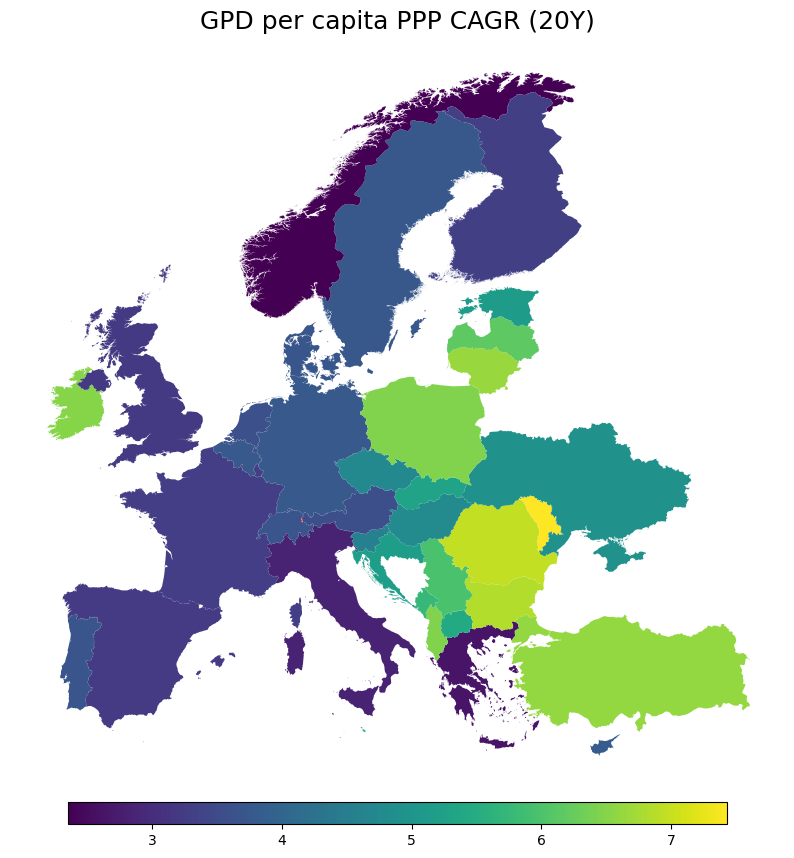

In [27]:
fig, axis = plt.subplots(1, 1, figsize=(10, 10))
plt.title("GPD per capita PPP CAGR (20Y)", fontdict={'fontsize': '18', 'fontweight' : '3'})
cax = inset_axes(axis, width="85%", height="3%", loc='lower center', borderpad=-2.5)
# cax = divider.append_axes("right", size="5%", pad=-1)
gdp_percap_df_merged.plot(
    ax = axis, 
    cmap='viridis', 
    column='CAGR (20Y)', 
    legend=True, 
    cax=cax, 
    legend_kwds={'orientation' : "horizontal"},
    missing_kwds={"color": "lightgrey","edgecolor": "red","hatch": "///","label": "Missing values"},
    linewidth=0.1)
axis.set_axis_off()

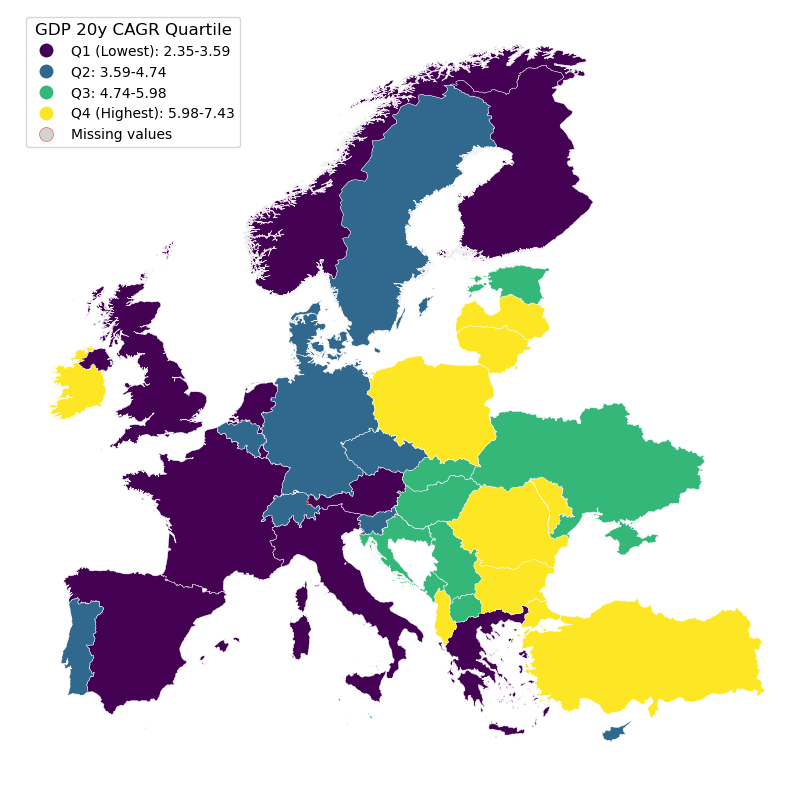

In [16]:
cagr_quartiles = gdp_percap_df_merged['CAGR (20Y)'].quantile([0.25, 0.5, 0.75])

# Create a new column to classify each country into a quartile
gdp_percap_df_merged['CAGR Quartile'] = pd.cut(
    gdp_percap_df_merged['CAGR (20Y)'],
    bins=[-np.inf] + cagr_quartiles.tolist() + [np.inf],
    labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)'],
    include_lowest=True
)

# Plot the choropleth map with the quintile classification
fig, axis = plt.subplots(1, 1, figsize=(15,15))
divider = make_axes_locatable(axis)
gdp_percap_df_merged.plot(
    ax=axis,
    column='CAGR Quartile',
    cmap='viridis',
    legend=True,
    legend_kwds={'title': 'GDP 20y CAGR Quartile'},
    missing_kwds={"color": "lightgrey","edgecolor": "red","hatch": "///","label": "Missing values"},
    # scheme="quantiles",
    # k=4,
    linewidth=0.3,
    edgecolor="white",
    # alpha=1
)

# Customize the legend
legend = axis.get_legend()
legend.get_title().set_fontsize(12)

# Add range values to legend labels
labels = [f"Q1 (Lowest): {gdp_percap_df_merged["CAGR (20Y)"].min()}-{cagr_quartiles.iloc[0]:.2f}",
          f"Q2: {cagr_quartiles.iloc[0]:.2f}-{cagr_quartiles.iloc[1]:.2f}",
          f"Q3: {cagr_quartiles.iloc[1]:.2f}-{cagr_quartiles.iloc[2]:.2f}",
          f"Q4 (Highest): {cagr_quartiles.iloc[2]:.2f}-{gdp_percap_df_merged["CAGR (20Y)"].max()}"]
legend.texts[0].set_text(labels[0])
legend.texts[1].set_text(labels[1])
legend.texts[2].set_text(labels[2])
legend.texts[3].set_text(labels[3])

legend = axis.get_legend()
legend.set_bbox_to_anchor((0.3, 1))

axis.set_axis_off()
plt.show()

Puc fer una gráfica que en la que començen tots en 100 (p.e.) i vaja evolucionant al ritme que evoluciona el pib, paregut a esto
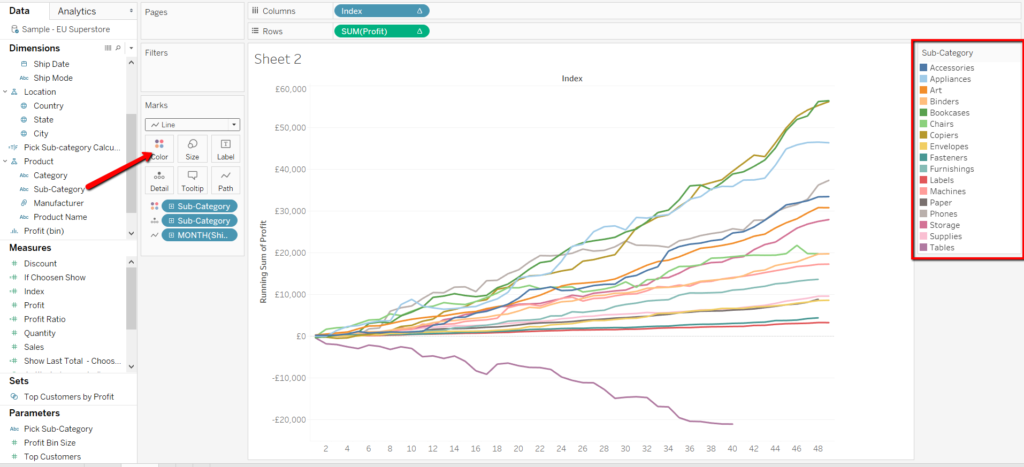

## Unemployment

In [114]:
unemployment_df = pd.read_csv("unemployment_data.csv")
unemployment_df = unemployment_df.loc[:, ["Country Name", "Country Code"]+[str(year) for year in range(1995, 2024)]][unemployment_df["Country Code"].isin(europe_df["ISO3_CODE"].unique())]
unemployment_df_merged = europe_df.merge(unemployment_df, how="left", left_on="ISO3_CODE", right_on="Country Code").drop(["Country Code", "Country Name"], axis=1)
unemployment_df.shape, unemployment_df.head()

((38, 31),
    Country Name Country Code    1995    1996    1997    1998   1999    2000  \
 5       Albania          ALB  14.611  13.931  16.876  20.047  20.84  19.028   
 14      Austria          AUT   4.350   5.280   5.150   5.520   4.70   4.690   
 17      Belgium          BEL   9.340   9.480   8.950   9.320   8.65   6.590   
 21     Bulgaria          BGR  11.100  12.500  13.700  12.200  14.10  16.220   
 37  Switzerland          CHE   3.090   3.680   4.130   3.570   3.05   2.660   
 
       2001    2002  ...   2014   2015   2016   2017   2018   2019    2020  \
 5   18.575  17.895  ...  18.05  17.19  15.42  13.62  12.30  11.47  12.833   
 14   4.010   4.850  ...   5.67   5.80   6.06   5.56   4.93   4.56   5.200   
 17   6.180   6.910  ...   8.52   8.48   7.83   7.09   5.95   5.36   5.550   
 21  19.920  18.110  ...  11.42   9.14   7.57   6.16   5.21   4.23   5.120   
 37   2.490   2.920  ...   4.83   4.80   4.92   4.80   4.71   4.39   4.820   
 
      2021    2022    2023  
 5   12.

In [115]:
def calculate_returns(df, initial_year=1995, final_year=2023):
    average_unemployment = df.loc[:, [str(year) for year in range(initial_year, final_year+1)]].mean(axis=1)
    return average_unemployment
unemployment_df_merged['Average Unemployment'] = calculate_returns(unemployment_df_merged, initial_year=1995, final_year=2023)

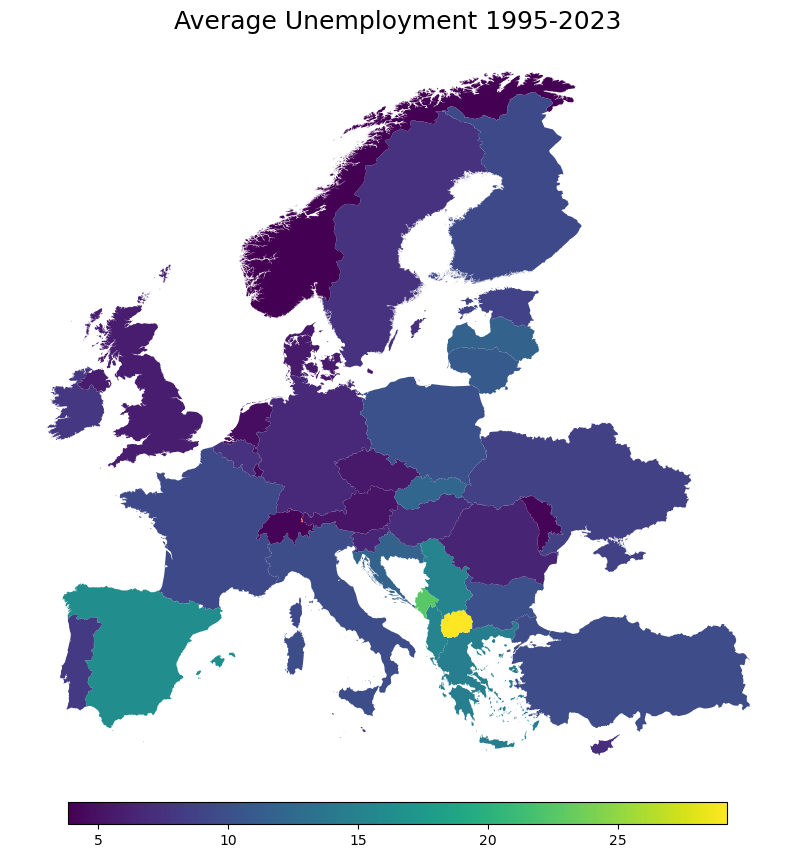

In [116]:
fig, axis = plt.subplots(1, 1, figsize=(10, 10))
plt.title("Average Unemployment 1995-2023", fontdict={'fontsize': '18', 'fontweight' : '3'})
cax = inset_axes(axis, width="85%", height="3%", loc='lower center', borderpad=-2.5)
# cax = divider.append_axes("right", size="5%", pad=-1)
unemployment_df_merged.plot(
    ax = axis, 
    cmap='viridis', 
    column='Average Unemployment', 
    legend=True, 
    cax=cax, 
    legend_kwds={'orientation' : "horizontal"},
    missing_kwds={"color": "lightgrey","edgecolor": "red","hatch": "///","label": "Missing values"},
    linewidth=0.1)
axis.set_axis_off()

## Corruption

In [117]:
cpi_df = pd.read_csv("cpi_1998_2015.csv")
corr_df = pd.read_csv("ti-corruption-perception-index.csv")
corr_df = corr_df.pivot(index='Entity', columns='Year', values='Corruption Perception Index - Transparency International (2018)').reset_index()
corr_df.columns = corr_df.columns.astype(str)
cpi_df = cpi_df.merge(corr_df[['Entity', "2016", "2017", "2018"]], left_on="Jurisdiction", right_on="Entity", how="left").drop("Entity", axis=1)
year_range = [str(year) for year in range(1998, 2012)]
cpi_df = cpi_df.replace('-', np.nan)
cpi_df.iloc[:, 1:] = cpi_df.iloc[:, 1:].astype(float)
cpi_df[year_range] = cpi_df[year_range] * 10
cpi_df_merged = europe_df.merge(cpi_df, how="left", left_on="NAME_ENGL", right_on="Jurisdiction").drop("Jurisdiction", axis=1)
cpi_df_merged.head()

,id,NAME_ENGL,ISO3_CODE,CAPT,geometry,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,FR,France,FRA,Paris,"MULTIPOLYGON (((9.42712 43.00940, 9.43144 43.0...",67.0,66.0,67.0,67.0,63.0,...,69.0,68.0,70.1,71.0,71.0,69.0,70.0,69.0,70.0,72.0
1,CY,Cyprus,CYP,Nicosia,"MULTIPOLYGON (((34.60609 35.70767, 34.60060 35...",NaN,NaN,NaN,NaN,NaN,...,66.0,63.0,62.7,66.0,63.0,63.0,61.0,55.0,57.0,59.0
2,ES,Spain,ESP,Madrid,"MULTIPOLYGON (((4.09361 40.06178, 4.10332 40.0...",61.0,66.0,70.0,70.0,71.0,...,61.0,61.0,62.3,65.0,59.0,60.0,58.0,58.0,57.0,58.0
3,MT,Malta,MLT,Valletta,"MULTIPOLYGON (((14.36876 35.99715, 14.37539 35...",NaN,NaN,NaN,NaN,NaN,...,52.0,56.0,55.9,57.0,56.0,55.0,56.0,55.0,56.0,54.0
4,PT,Portugal,PRT,Lisbon,"MULTIPOLYGON (((-7.40192 37.17483, -7.39622 37...",65.0,67.0,64.0,63.0,63.0,...,58.0,60.0,61.0,63.0,62.0,63.0,63.0,62.0,63.0,64.0


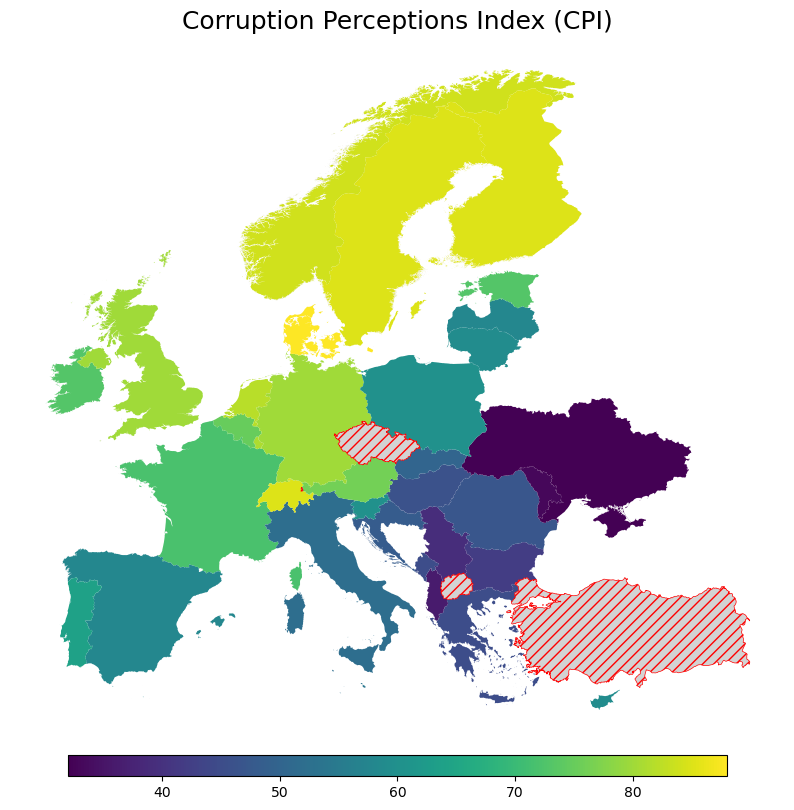

In [118]:
fig, axis = plt.subplots(1, 1, figsize=(10,10))
plt.title("Corruption Perceptions Index (CPI)", fontdict={'fontsize': '18', 'fontweight' : '3'})
cax = inset_axes(axis, width="85%", height="3%", loc='lower center', borderpad=-2.5)
cpi_df_merged.plot(
    ax=axis,
    cax=cax,
    column='2018',
    cmap='viridis',
    legend=True,
    missing_kwds={"color": "lightgrey","edgecolor": "red","hatch": "///","label": "Missing values"},
    legend_kwds={'orientation' : "horizontal"},
    linewidth=0.5
)

cbar = plt.gcf().axes[-1]  # Get the colorbar axis
# cbar.set_ylabel('Average Unemployment 1995-2023', fontsize=12)  # Set the colorbar title
axis.set_axis_off()

plt.show()

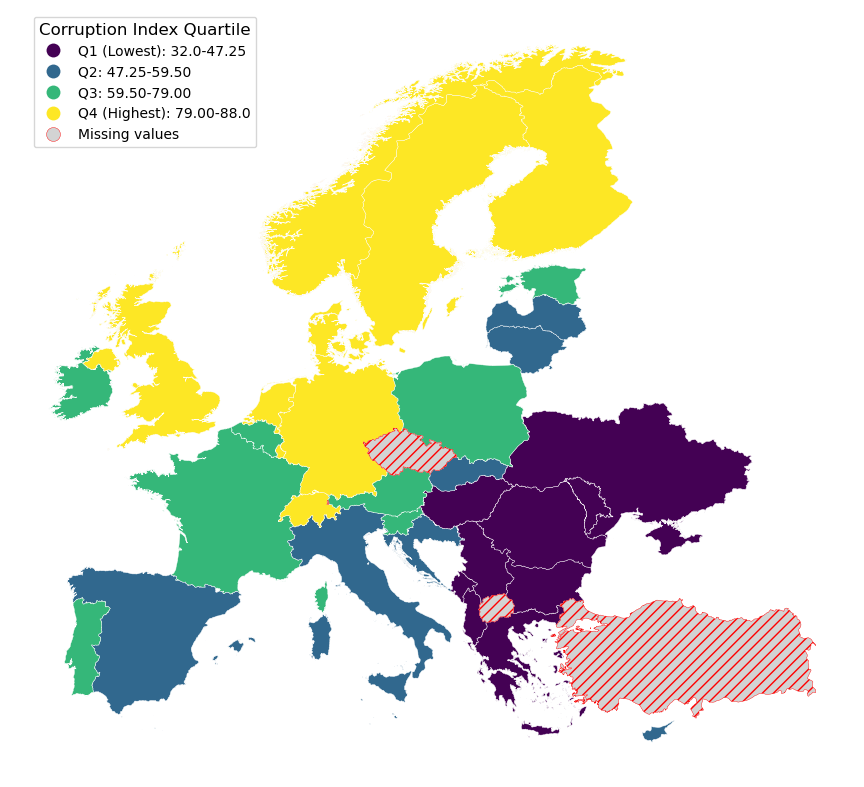

In [31]:
corruption_quartiles = cpi_df_merged['2018'].quantile([0.25, 0.5, 0.75])

# Create a new column to classify each country into a quartile
cpi_df_merged['Corruption Quartile'] = pd.cut(
    cpi_df_merged['2018'],
    bins=[-np.inf] + corruption_quartiles.tolist() + [np.inf],
    labels=['Q1', 'Q2', 'Q3', 'Q4'],
    include_lowest=True
)

# Plot the choropleth map with the quintile classification
fig, axis = plt.subplots(1, 1, figsize=(15,15))
divider = make_axes_locatable(axis)
cpi_df_merged.plot(
    ax=axis,
    column='Corruption Quartile',
    cmap='viridis',
    legend=True,
    legend_kwds={'title': 'Corruption Index Quartile'},
    missing_kwds={"color": "lightgrey","edgecolor": "red","hatch": "///","label": "Missing values"},
    # scheme="quantiles",
    # k=4,
    linewidth=0.3,
    edgecolor="white",
    # alpha=1
)

# Customize the legend
legend = axis.get_legend()
legend.get_title().set_fontsize(12)



# Add range values to legend labels
labels = [f"Q1 (Lowest): {cpi_df_merged["2018"].min()}-{corruption_quartiles.iloc[0]:.2f}",
          f"Q2: {corruption_quartiles.iloc[0]:.2f}-{corruption_quartiles.iloc[1]:.2f}",
          f"Q3: {corruption_quartiles.iloc[1]:.2f}-{corruption_quartiles.iloc[2]:.2f}",
          f"Q4 (Highest): {corruption_quartiles.iloc[2]:.2f}-{cpi_df_merged["2018"].max()}"]
legend.texts[0].set_text(labels[0])
legend.texts[1].set_text(labels[1])
legend.texts[2].set_text(labels[2])
legend.texts[3].set_text(labels[3])

legend = axis.get_legend()
legend.set_bbox_to_anchor((0.3, 1))

axis.set_axis_off()
plt.show()

In [119]:
year = 2018  # desired year
value = cpi_df[cpi_df["Jurisdiction"] == "Spain"]["2018"].values[0]  # desired CPI score
range_value = 5  # range around the desired score

# select the column for the desired year
year_column = cpi_df[f'{year}']

# set the range
lower_bound = value - range_value
upper_bound = value + range_value

# filter the dataframe
countries_in_range = cpi_df.loc[(year_column >= lower_bound) & (year_column <= upper_bound)]
countries_in_range

,Jurisdiction,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
22,Botswana,61.0,61.0,60.0,60.0,64.0,57.0,60.0,59.0,56.0,...,56.0,58.0,60.8,65.0,64.0,63.0,63.0,60.0,61.0,61.0
24,Brunei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,55.0,52.1,55.0,60.0,NaN,NaN,58.0,62.0,63.0
32,Cape Verde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.0,51.0,55.2,60.0,58.0,57.0,55.0,59.0,55.0,57.0
49,Costa Rica,56.0,51.0,54.0,45.0,45.0,43.0,49.0,42.0,41.0,...,53.0,53.0,48.0,54.0,53.0,54.0,55.0,58.0,59.0,56.0
56,Cyprus,NaN,NaN,NaN,NaN,NaN,61.0,54.0,57.0,56.0,...,66.0,63.0,62.7,66.0,63.0,63.0,61.0,55.0,57.0,59.0
64,Dominica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,...,59.0,52.0,51.7,58.0,58.0,58.0,NaN,59.0,57.0,57.0
81,Georgia,NaN,23.0,NaN,NaN,24.0,18.0,20.0,23.0,28.0,...,41.0,38.0,41.3,52.0,49.0,52.0,52.0,57.0,56.0,58.0
100,Israel,71.0,68.0,66.0,76.0,73.0,70.0,64.0,63.0,59.0,...,61.0,61.0,58.1,60.0,61.0,60.0,61.0,64.0,62.0,61.0
117,Latvia,27.0,34.0,34.0,34.0,37.0,38.0,40.0,42.0,47.0,...,45.0,43.0,41.9,49.0,53.0,55.0,55.0,57.0,58.0,58.0
122,Lithuania,NaN,38.0,41.0,48.0,48.0,47.0,46.0,48.0,48.0,...,49.0,50.0,47.5,54.0,57.0,58.0,61.0,59.0,59.0,59.0


In [120]:
year = 2018  # desired year
year_range = [str(year-2), str(year-1), str(year)]
value = cpi_df[cpi_df["Jurisdiction"] == "Spain"][year_range].mean(axis=1).values  # desired CPI score
range_value = 5  # range around the desired score

# select the columns for the desired 3-year period
year_columns = cpi_df[[f"{year-2}", f"{year-1}", f"{year}"]]

# calculate the 3-year mean for each country
three_year_mean = year_columns.mean(axis=1)

# set the range
lower_bound = (value - range_value)[0]
upper_bound = (value + range_value)[0]

# filter the dataframe
countries_in_range = cpi_df[(three_year_mean >= lower_bound) & (three_year_mean <= upper_bound)]
countries_in_range = countries_in_range.sort_values(by='2018', ascending=False)
countries_in_range = countries_in_range.drop([168], axis=0)

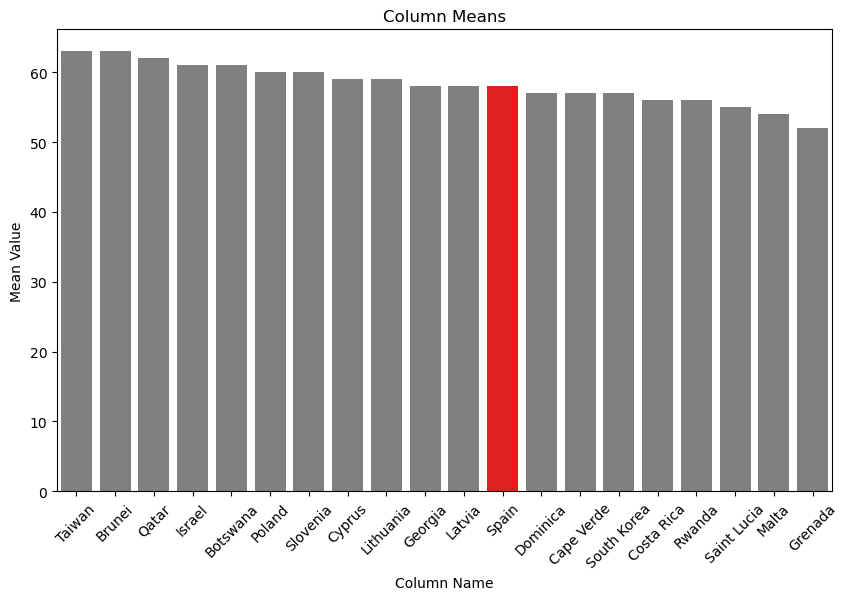

In [121]:
plt.figure(figsize=(10, 6))
values = np.array(countries_in_range["2018"])
idx = np.array(countries_in_range["Jurisdiction"])
clrs = ['red' if (x == "Spain") else 'gray' for x in idx]
sns.barplot(x=idx, y=values, palette=clrs)

plt.title('Column Means')
plt.xlabel('Column Name')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)

plt.show()

## Education system

In [145]:
    pisa_reading = pd.read_csv("pisa_reading_clean.csv")
    pisa_science = pd.read_csv("pisa_science_clean.csv")
    pisa_maths = pd.read_csv("pisa_maths_clean.csv")

In [146]:
cols = pisa_science.columns[1:]
means = []
for a, b, c in zip(pisa_reading[cols].iterrows(), pisa_maths[cols].iterrows(), pisa_science[cols].iterrows()):
    year = a[1]
    a, b, c = a[1].to_numpy(), b[1].to_numpy(), c[1].to_numpy()
    arr = np.array([a,b,c])
    mean = np.round(np.nanmean(arr, axis=0))
    means.append(mean)

cols = pisa_reading.columns[6:]
for idx, (a, b) in enumerate(zip(pisa_reading[cols].iterrows(), pisa_maths[cols].iterrows())):
    year = a[1]
    a, b = a[1].to_numpy(), b[1].to_numpy()
    arr = np.array([a,b])
    mean = np.round(np.nanmean(arr, axis=0))
    means[idx] = np.append(means[idx], mean)

C:\Users\danic\AppData\Local\Temp\ipykernel_13272\4213622346.py:7: RuntimeWarning: Mean of empty slice
  mean = np.round(np.nanmean(arr, axis=0))
C:\Users\danic\AppData\Local\Temp\ipykernel_13272\4213622346.py:15: RuntimeWarning: Mean of empty slice
  mean = np.round(np.nanmean(arr, axis=0))


In [147]:
pisa_means_df = pd.DataFrame(means, columns=pisa_reading.columns[1:])
pisa_means_df["Country"] = pisa_reading["Country"]
cols = pisa_means_df.columns
cols = cols[-1:].append(cols[:-1])
pisa_means_df = pisa_means_df[cols]
pisa_means_df

,Country,2018,2015,2012,2009,2006,2003,2000
0,Albania,420.0,415.0,395.0,384.0,NaN,NaN,365.0
1,Algeria,NaN,362.0,NaN,NaN,NaN,NaN,NaN
2,Argentina,395.0,422.0,NaN,NaN,NaN,NaN,388.0
3,Australia,499.0,502.0,512.0,519.0,520.0,524.0,530.0
4,Austria,491.0,492.0,501.0,487.0,502.0,498.0,498.0
...,...,...,...,...,...,...,...,...
68,United Arab Emirates,434.0,433.0,441.0,NaN,NaN,NaN,NaN
69,United Kingdom,504.0,500.0,502.0,500.0,502.0,508.0,526.0
70,United States,495.0,488.0,492.0,496.0,482.0,489.0,498.0
71,Uruguay,424.0,430.0,412.0,427.0,423.0,428.0,NaN


In [148]:
pisa_merged_df = europe_df.merge(pisa_means_df, how="left", left_on="NAME_ENGL", right_on="Country").drop("Country", axis=1)
pisa_merged_df.head()

,id,NAME_ENGL,ISO3_CODE,CAPT,geometry,2018,2015,2012,2009,2006,2003,2000
0,FR,France,FRA,Paris,"MULTIPOLYGON (((9.42712 43.00940, 9.43144 43.0...",494.0,496.0,500.0,497.0,493.0,504.0,511.0
1,CY,Cyprus,CYP,Nicosia,"MULTIPOLYGON (((34.60609 35.70767, 34.60060 35...",438.0,438.0,NaN,NaN,NaN,NaN,NaN
2,ES,Spain,ESP,Madrid,"MULTIPOLYGON (((4.09361 40.06178, 4.10332 40.0...",482.0,492.0,489.0,484.0,476.0,483.0,484.0
3,MT,Malta,MLT,Valletta,"MULTIPOLYGON (((14.36876 35.99715, 14.37539 35...",459.0,464.0,NaN,NaN,NaN,NaN,NaN
4,PT,Portugal,PRT,Lisbon,"MULTIPOLYGON (((-7.40192 37.17483, -7.39622 37...",492.0,497.0,488.0,490.0,471.0,472.0,462.0


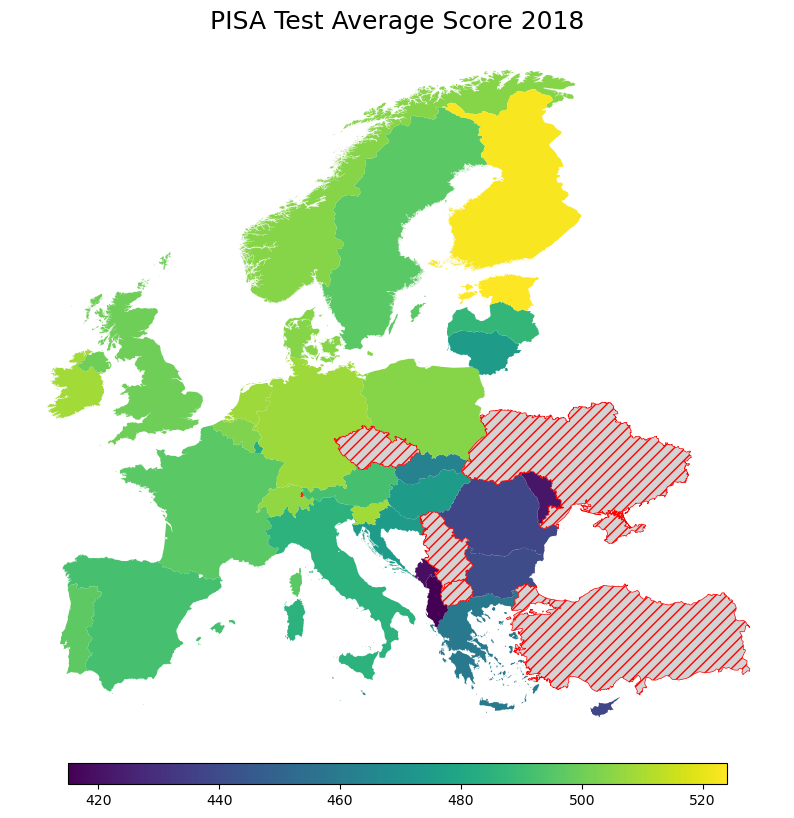

In [127]:
fig, axis = plt.subplots(1, 1, figsize=(10,10))
plt.title("PISA Test Average Score 2018", fontdict={'fontsize': '18', 'fontweight' : '3'})
cax = inset_axes(axis, width="85%", height="3%", loc='lower center', borderpad=-2.5)
pisa_merged_df.plot(
    ax=axis,
    cax=cax,
    column='2018',
    cmap='viridis',
    legend=True,
    missing_kwds={"color": "lightgrey","edgecolor": "red","hatch": "///","label": "Missing values"},
    legend_kwds={'orientation' : "horizontal"},
    linewidth=0.5
)

cbar = plt.gcf().axes[-1]  # Get the colorbar axis
# cbar.set_ylabel('Average Unemployment 1995-2023', fontsize=12)  # Set the colorbar title
axis.set_axis_off()

plt.show()

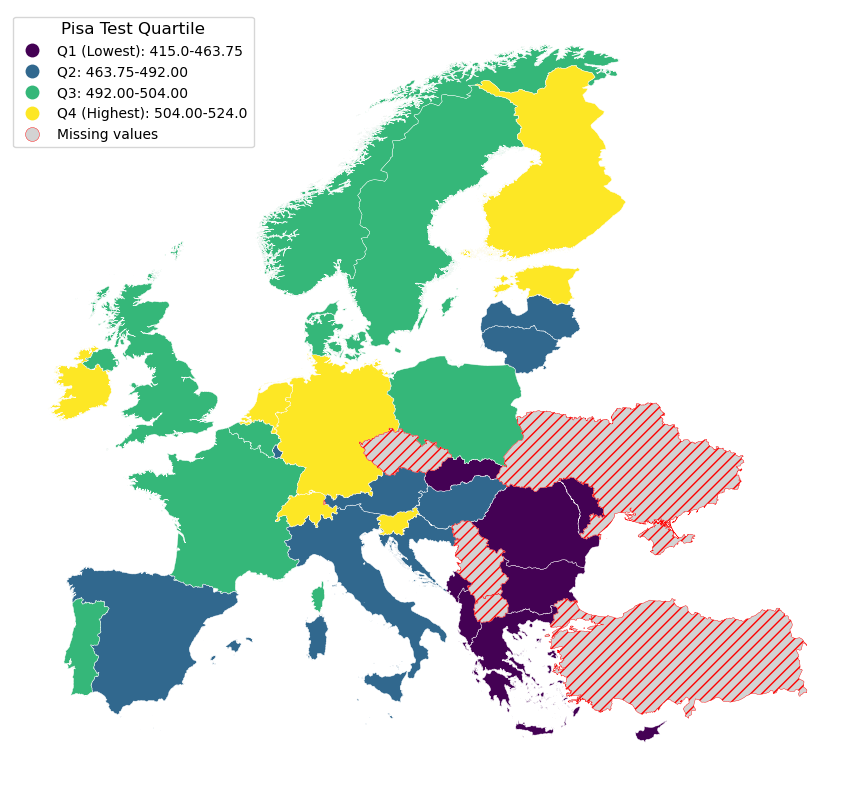

In [129]:
pisa_quartiles = pisa_merged_df['2018'].quantile([0.25, 0.5, 0.75])

# Create a new column to classify each country into a quartile
pisa_merged_df['Pisa Quartile'] = pd.cut(
    pisa_merged_df['2018'],
    bins=[-np.inf] + pisa_quartiles.tolist() + [np.inf],
    labels=['Q1', 'Q2', 'Q3', 'Q4'],
    include_lowest=True
)

# Plot the choropleth map with the quintile classification
fig, axis = plt.subplots(1, 1, figsize=(15,15))
divider = make_axes_locatable(axis)
pisa_merged_df.plot(
    ax=axis,
    column='Pisa Quartile',
    cmap='viridis',
    legend=True,
    legend_kwds={'title': 'Pisa Test Quartile'},
    missing_kwds={"color": "lightgrey","edgecolor": "red","hatch": "///","label": "Missing values"},
    # scheme="quantiles",
    # k=4,
    linewidth=0.3,
    edgecolor="white",
    # alpha=1
)

# Customize the legend
legend = axis.get_legend()
legend.get_title().set_fontsize(12)



# Add range values to legend labels
labels = [f"Q1 (Lowest): {pisa_merged_df["2018"].min()}-{pisa_quartiles.iloc[0]:.2f}",
          f"Q2: {pisa_quartiles.iloc[0]:.2f}-{pisa_quartiles.iloc[1]:.2f}",
          f"Q3: {pisa_quartiles.iloc[1]:.2f}-{pisa_quartiles.iloc[2]:.2f}",
          f"Q4 (Highest): {pisa_quartiles.iloc[2]:.2f}-{pisa_merged_df["2018"].max()}"]
legend.texts[0].set_text(labels[0])
legend.texts[1].set_text(labels[1])
legend.texts[2].set_text(labels[2])
legend.texts[3].set_text(labels[3])

legend = axis.get_legend()
legend.set_bbox_to_anchor((0.3, 1))

axis.set_axis_off()
plt.show()

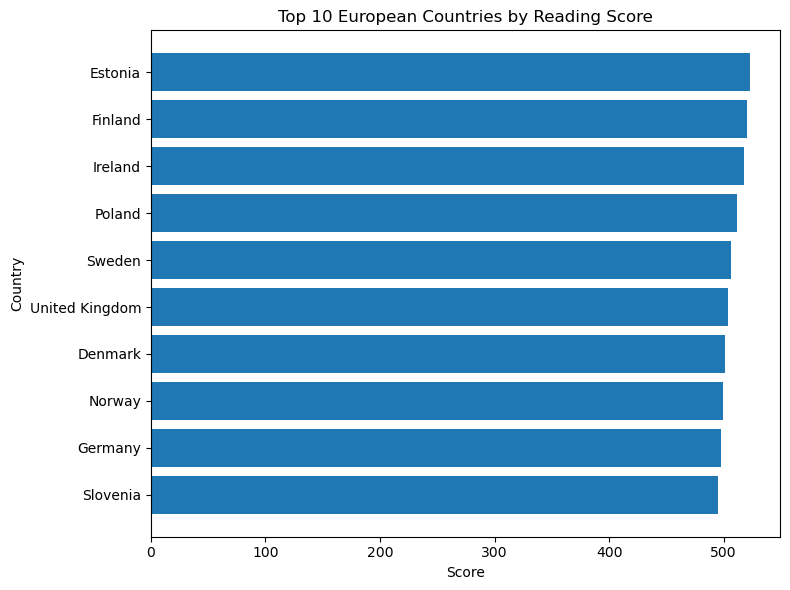

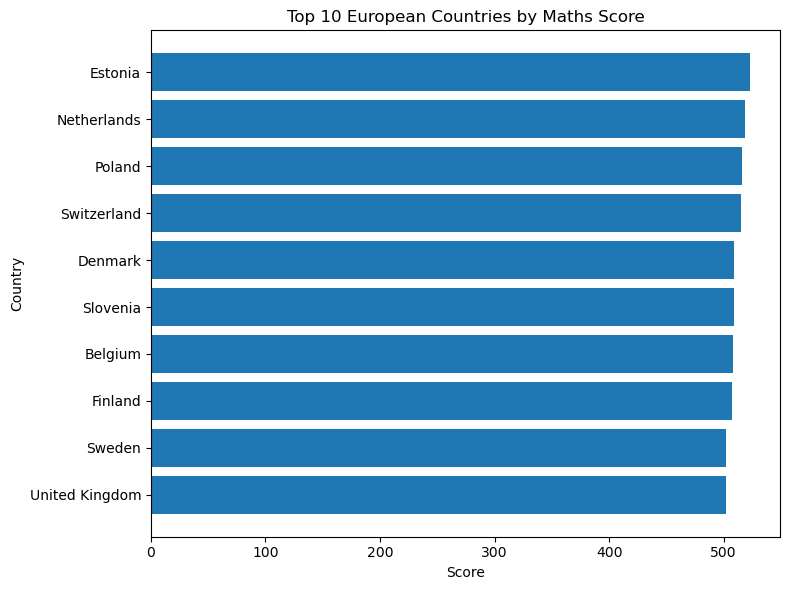

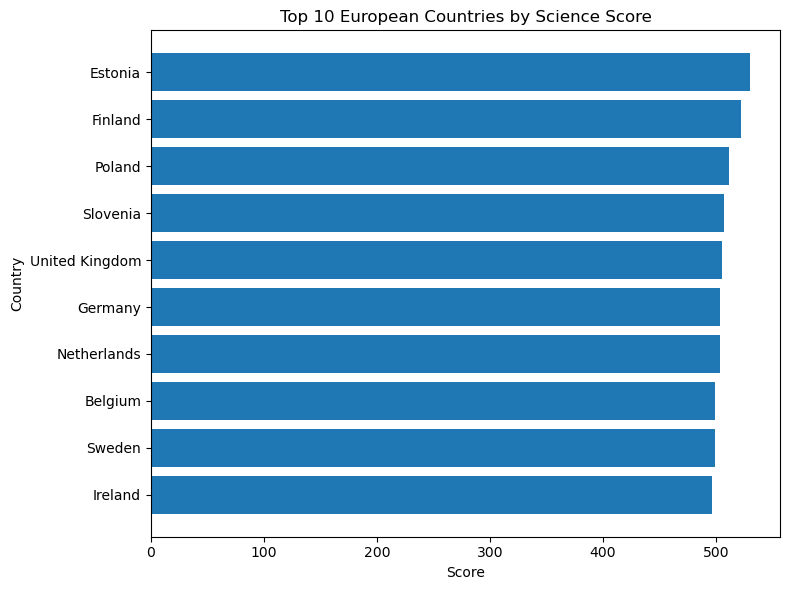

In [16]:
import matplotlib.pyplot as plt

# Create a figure and axis object for reading
fig, ax = plt.subplots(figsize=(8, 6))

# Filter European countries and plot top 10 countries for reading
europe_reading = pisa_reading[pisa_reading['Country'].isin(europe_df["NAME_ENGL"].unique())]
top_reading = europe_reading.nlargest(10, '2018')
ax.barh(top_reading['Country'][::-1], top_reading['2018'][::-1])
ax.set_title('Top 10 European Countries by Reading Score')
ax.set_xlabel('Score')
ax.set_ylabel('Country')

plt.tight_layout()
plt.show()

# Create a figure and axis object for maths
fig, ax = plt.subplots(figsize=(8, 6))

# Filter European countries and plot top 10 countries for maths
europe_maths = pisa_maths[pisa_maths['Country'].isin(europe_df["NAME_ENGL"].unique())]
top_maths = europe_maths.nlargest(10, '2018')
ax.barh(top_maths['Country'][::-1], top_maths['2018'][::-1])
ax.set_title('Top 10 European Countries by Maths Score')
ax.set_xlabel('Score')
ax.set_ylabel('Country')

plt.tight_layout()
plt.show()

# Create a figure and axis object for science
fig, ax = plt.subplots(figsize=(8, 6))

# Filter European countries and plot top 10 countries for science
europe_science = pisa_science[pisa_science['Country'].isin(europe_df["NAME_ENGL"].unique())]
top_science = europe_science.nlargest(10, '2018')
ax.barh(top_science['Country'][::-1], top_science['2018'][::-1])
ax.set_title('Top 10 European Countries by Science Score')
ax.set_xlabel('Score')
ax.set_ylabel('Country')

plt.tight_layout()

plt.show()

In [149]:
edu_spending_df = pd.read_csv("total-government-expenditure-on-education-gdp.csv")
edu_spending_df = edu_spending_df.pivot(index='Entity', columns='Year', values='Historical and more recent expenditure estimates').reset_index()
edu_spending_df = edu_spending_df[edu_spending_df["Entity"].isin(europe_df["NAME_ENGL"].unique())].reset_index().drop(["index"],axis=1)
edu_spending_df = edu_spending_df.loc[:, ["Entity"]+[year for year in range(1995, 2023)]]
edu_spending_df.columns = edu_spending_df.columns.astype(str)
edu_spending_df

Year,Entity,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Albania,3.81464,3.08351,3.37947,3.53698,3.59293,3.430170,3.458700,3.117800,3.138230,...,3.539300,3.216967,3.437970,3.962090,3.61172,3.152945,3.91624,3.342300,3.090421,NaN
1,Austria,5.42835,5.25990,NaN,6.10374,6.11234,5.588810,5.575480,5.522130,5.361830,...,5.547110,5.447620,5.456580,5.479620,5.37159,5.226550,5.21750,5.569010,4.986500,NaN
2,Belgium,2.98866,3.04948,NaN,NaN,NaN,5.532733,5.676055,5.789684,5.891302,...,6.630530,6.590470,6.451570,6.461730,6.42534,6.381070,6.33397,6.812330,6.234233,NaN
3,Bulgaria,2.37207,2.23008,NaN,2.73943,NaN,4.219833,3.384240,3.386080,3.998450,...,4.058230,4.070053,3.912084,3.393708,4.07527,4.045290,4.19715,4.502870,4.492648,NaN
4,Croatia,NaN,NaN,NaN,NaN,NaN,6.112709,5.680865,3.823010,3.869020,...,4.538440,5.176151,4.969085,4.896224,3.88922,3.945780,3.95437,4.434420,5.203670,NaN
5,Cyprus,3.74123,NaN,NaN,NaN,4.77208,4.989540,5.115520,5.581670,6.670230,...,6.467470,6.421110,6.304910,6.118110,5.69962,5.039630,5.21297,5.686290,5.619416,NaN
6,Czechia,4.51755,4.24491,NaN,3.58012,3.66753,3.640340,3.732830,3.958780,4.117280,...,4.046760,3.965230,5.751820,5.553730,3.80616,4.266060,4.54247,4.721590,5.053264,NaN
7,Denmark,7.47104,7.88494,NaN,8.10675,7.93116,8.084340,8.215450,8.213030,8.121930,...,8.494430,7.634850,7.010415,7.476940,7.11586,7.000150,6.90970,7.389110,6.039749,NaN
8,Estonia,5.89866,6.05492,6.33788,6.23536,6.65249,5.339460,5.228460,5.434610,5.273100,...,4.843880,4.394330,5.144190,5.157640,4.96132,5.239970,5.29571,5.519930,5.910653,NaN
9,Finland,6.80991,6.85898,NaN,NaN,5.86993,5.709300,5.840250,6.016780,6.167440,...,7.124040,7.102370,7.032080,6.851530,6.36311,6.275580,6.41695,6.634940,5.693809,NaN


In [174]:
pisa_merged_df[["NAME_ENGL", "2018"]].sort_values('2018', ascending=False).reset_index(drop=True).head(15)

,NAME_ENGL,2018
0,Estonia,525.0
1,Finland,516.0
2,Poland,513.0
3,Ireland,505.0
4,United Kingdom,504.0
5,Slovenia,504.0
6,Sweden,502.0
7,Netherlands,502.0
8,Denmark,501.0
9,Germany,500.0


In [173]:
edu_spending_df[["Entity", "2018"]][edu_spending_df["2018"] >= 5.23].sort_values('2018', ascending=False).reset_index(drop=True)

Year,Entity,2018
0,Sweden,7.64084
1,Norway,7.59563
2,Denmark,7.00015
3,Belgium,6.38107
4,Finland,6.27558
5,Moldova,5.53888
6,France,5.40717
7,Netherlands,5.35765
8,Ukraine,5.31992
9,Estonia,5.23997


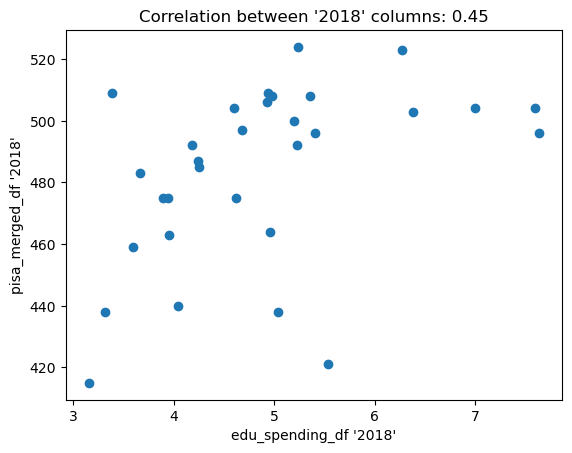

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge the two dataframes on a common index or column
merged_df = pd.merge(edu_spending_df[["Entity", "2018"]], pisa_merged_df[["NAME_ENGL", "2018"]].rename({"NAME_ENGL":"Entity"},axis=1), on='Entity')

# Calculate the correlation between the "2018" columns
correlation = merged_df['2018_x'].corr(merged_df['2018_y'])

# Create a scatter plot
plt.scatter(merged_df['2018_x'], merged_df['2018_y'])

# Add title and labels
plt.title(f"Correlation between '2018' columns: {correlation:.2f}")
plt.xlabel("edu_spending_df '2018'")
plt.ylabel("pisa_merged_df '2018'")

# Show the plot
plt.show()

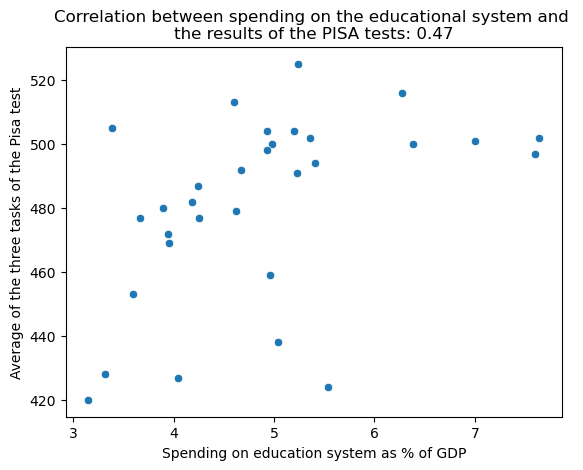

In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Merge the two dataframes on a common index or column
merged_df = pd.merge(edu_spending_df[["Entity", "2018"]], pisa_merged_df[["NAME_ENGL", "2018"]].rename({"NAME_ENGL":"Entity"},axis=1), on='Entity')

# Calculate the correlation between the "2018" columns
correlation = merged_df['2018_x'].corr(merged_df['2018_y'])

# Create a scatter plot using Seaborn
sns.scatterplot(x='2018_x', y='2018_y', data=merged_df)

# Add title and labels
plt.title(f"Correlation between spending on the educational system and \nthe results of the PISA tests: {correlation:.2f}")
plt.xlabel("Spending on education system as % of GDP")
plt.ylabel("Average of the three tasks of the Pisa test")

# Show the plot
plt.show()

In [151]:
edu_spending_df.head(10)

Year,Entity,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Albania,3.81464,3.08351,3.37947,3.53698,3.59293,3.430170,3.458700,3.117800,3.138230,...,3.53930,3.216967,3.437970,3.962090,3.61172,3.152945,3.91624,3.34230,3.090421,NaN
1,Austria,5.42835,5.25990,NaN,6.10374,6.11234,5.588810,5.575480,5.522130,5.361830,...,5.54711,5.447620,5.456580,5.479620,5.37159,5.226550,5.21750,5.56901,4.986500,NaN
2,Belgium,2.98866,3.04948,NaN,NaN,NaN,5.532733,5.676055,5.789684,5.891302,...,6.63053,6.590470,6.451570,6.461730,6.42534,6.381070,6.33397,6.81233,6.234233,NaN
3,Bulgaria,2.37207,2.23008,NaN,2.73943,NaN,4.219833,3.384240,3.386080,3.998450,...,4.05823,4.070053,3.912084,3.393708,4.07527,4.045290,4.19715,4.50287,4.492648,NaN
4,Croatia,NaN,NaN,NaN,NaN,NaN,6.112709,5.680865,3.823010,3.869020,...,4.53844,5.176151,4.969085,4.896224,3.88922,3.945780,3.95437,4.43442,5.203670,NaN
5,Cyprus,3.74123,NaN,NaN,NaN,4.77208,4.989540,5.115520,5.581670,6.670230,...,6.46747,6.421110,6.304910,6.118110,5.69962,5.039630,5.21297,5.68629,5.619416,NaN
6,Czechia,4.51755,4.24491,NaN,3.58012,3.66753,3.640340,3.732830,3.958780,4.117280,...,4.04676,3.965230,5.751820,5.553730,3.80616,4.266060,4.54247,4.72159,5.053264,NaN
7,Denmark,7.47104,7.88494,NaN,8.10675,7.93116,8.084340,8.215450,8.213030,8.121930,...,8.49443,7.634850,7.010415,7.476940,7.11586,7.000150,6.90970,7.38911,6.039749,NaN
8,Estonia,5.89866,6.05492,6.33788,6.23536,6.65249,5.339460,5.228460,5.434610,5.273100,...,4.84388,4.394330,5.144190,5.157640,4.96132,5.239970,5.29571,5.51993,5.910653,NaN
9,Finland,6.80991,6.85898,NaN,NaN,5.86993,5.709300,5.840250,6.016780,6.167440,...,7.12404,7.102370,7.032080,6.851530,6.36311,6.275580,6.41695,6.63494,5.693809,NaN


In [159]:
edu_merged = pd.merge(europe_df.rename({"NAME_ENGL":"Entity"},axis=1)[["Entity", "geometry"]], edu_spending_df[["Entity", "2018"]], on="Entity")

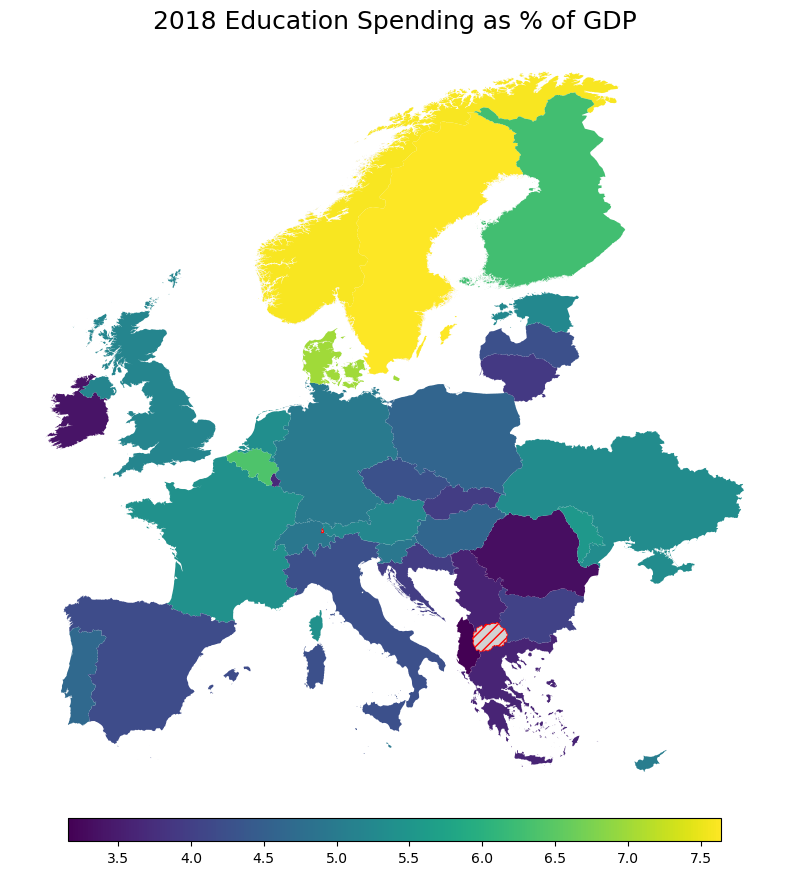

In [162]:
fig, axis = plt.subplots(1, 1, figsize=(10,10))
plt.title("2018 Education Spending as % of GDP", fontdict={'fontsize': '18', 'fontweight' : '3'})
cax = inset_axes(axis, width="85%", height="3%", loc='lower center', borderpad=-2.5)
edu_merged.plot(
    ax=axis,
    cax=cax,
    column='2018',
    cmap='viridis',
    legend=True,
    missing_kwds={"color": "lightgrey","edgecolor": "red","hatch": "///","label": "Missing values"},
    legend_kwds={'orientation' : "horizontal"},
    linewidth=0.5
)

cbar = plt.gcf().axes[-1]  # Get the colorbar axis
# cbar.set_ylabel('Average Unemployment 1995-2023', fontsize=12)  # Set the colorbar title
axis.set_axis_off()

plt.show()